## Get predictions (Label Transfer)

### Import

In [ ]:
! pip install sklearn-ann[annoy]

In [13]:
from sklearn_ann.kneighbors.annoy import AnnoyTransformer  # noqa: F401

In [5]:
condition_key = 'dataset'
cell_type_key = 'cell_type_tumor'

backup_path = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
surgery_path = f'{backup_path}/Zuani_99acc'
ref_path = '/root/datos/maestria/netopaas/lung_scRNA/LUCA_model/hvg_integrated_scvi_scanvi_tumor_model_b128_lay4_h1024_raydefault_epocs300-300/'

In [211]:
adata_query = sc.read_h5ad(f'{surgery_path}/query.h5ad')
model = sca.models.SCANVI.load(surgery_path, adata_query)
query_latent = sc.AnnData(model.get_latent_representation())
print(adata_query)
print(model)
model.view_anndata_setup()

INFO     File /root/datos/maestria/netopaas/luca_explore/surgeries//Zuani_99acc/model.pt already downloaded        


/usr/local/lib/python3.11/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_location=map_location)

AnnData object with n_obs × n_vars = 220866 × 5989
    obs: 'sample', 'barcode', 'Source Name', 'Characteristics[tumor grading]', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'stage', 'cell_type_tumor', 'dataset', '_scvi_batch', '_scvi_labels'
    var: 'n_counts', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'symbol', 'ensembl_gene_id'
    uns: '_scvi_manager_uuid', '_scvi_uuid'


ScanVI Model with the following params: 
unlabeled_category: Unknown, n_hidden: 1024, n_latent: 10, n_layers: 4, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: nb
Training status: Trained
Model's adata is minified?: False

Anndata setup with scvi-tools version 1.1.5.

Setup via `SCANVI.setup_anndata` with arguments:

{
│   'labels_key': 'cell_type_tumor',
│   'unlabeled_category': 'Unknown',
│   'layer': None,
│   'batch_key': 'dataset',
│   'size_factor_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     Summary Stat Key     ┃ Value  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│         n_batch          │   13   │
│         n_cells          │ 220866 │
│ n_extra_categorical_covs │   0    │
│ n_extra_continuous_covs  │   0    │
│         n_labels         │   52   │
│          n_vars          │  5989  │
└──────────────────────────┴────────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                              batch State Registry                               
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location    ┃            Categories            ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['dataset'] │         Chen_Zhang_2020          │          0          │
│                      │           He_Fan_2021            │          1          │
│                      │           Kim_Lee_2020           │          2          │
│                      │ Lambrechts_Thienpont_2018_6149v1 │          3          │
│                      │ Lambrechts_Thienpont_2018_6149v2 │          4          │
│                      │  Lambrechts_Thienpont_2018_6653  │          5          │
│                      │      Laughney_Massague_2020      │          6          │
│                      │       Maynard_Bivona_2020        │          7          │
│                      │              UKIM-V              │          8          │
│                      │             UKIM-V-2             │          9          │
│                      │           Wu_Zhou_2021           │         10          │
│                      │       Zilionis_Klein_2019        │         11          │
│                      │              Zuani               │         12          │
└──────────────────────┴──────────────────────────────────┴─────────────────────┘

                                 labels State Registry                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃       Source Location        ┃           Categories            ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['cell_type_tumor'] │      Alveolar cell type 1       │          0          │
│                              │      Alveolar cell type 2       │          1          │
│                              │             B cell              │          2          │
│                              │         B cell dividing         │          3          │
│                              │            Ciliated             │          4          │
│                              │              Club               │          5          │
│                              │            DC mature            │          6          │
│                              │    Endothelial cell arterial    │          7          │
│                              │   Endothelial cell capillary    │          8          │
│                              │   Endothelial cell lymphatic    │          9          │
│                              │     Endothelial cell venous     │         10          │
│                              │     Fibroblast adventitial      │         11          │
│                              │       Fibroblast alveolar       │         12          │
│                              │    Fibroblast peribronchial     │         13          │
│                              │           Macrophage            │         14          │
│                              │       Macrophage alveolar       │         15          │
│                              │            Mast cell            │         16          │
│                              │           Mesothelial           │         17          │
│                              │       Monocyte classical        │         18          │
│                              │     Monocyte non-classical      │         19          │
│                              │             NK cell             │         20          │
│                              │        NK cell dividing         │         21          │
│                              │           Neutrophils           │         22          │
│                              │            Pericyte             │         23          │
│                              │           Plasma cell           │         24          │
│                              │      Plasma cell dividing       │         25          │
│                              │    ROS1+ healthy epithelial     │         26          │
│                              │       Smooth muscle cell        │         27          │
│                              │           T cell CD4            │         28          │
│                              │       T cell CD4 dividing       │         29          │
│                              │      T cell CD8 activated       │         30          │
│                              │       T cell CD8 dividing       │         31          │
│                              │   T cell CD8 effector memory    │         32          │
│                              │        T cell CD8 naive         │         33          │
│                              │ T cell CD8 terminally exhausted │         34          │
│                              │         T cell NK-like          │         35          │
│                              │        T cell regulatory        │         36          │
│                              │        Tumor cells LUAD         │         37          │
│                              │      Tumor cells LUAD EMT       │         38          │
│                              │      Tumor cells LUAD MSLN      │         39          │
│                              │       Tumor cells LUAD NE       │         40       

In [54]:
ref_latent = sc.read_h5ad(f'{ref_path}/ref_latent.h5ad')
ref_latent

AnnData object with n_obs × n_vars = 402634 × 10
    obs: 'cell_type', 'batch', 'predictions'

### Get neighbours

In [55]:
m = 15
transformer = AnnoyTransformer(m)
%timeit sc.pp.neighbors(ref_latent, transformer=transformer, key_added='annnoy')

18.9 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [115]:
ref_neighbors, ref_distances = [], []
for obs_ix in range(0, query_latent.shape[0]):
    neigh_l, dist_l = transformer.annoy_.get_nns_by_vector(query_latent.X.T[:,obs_ix], m, search_k=-1, include_distances=True)
    ref_neighbors.append(neigh_l)
    ref_distances.append(dist_l)


We want to check if the assignment had good consensus, like with the uncertainties of the variatonal autoencoder.

For that we need a weight based on the distance distribution of the `m` neighbours to be comparable. We assign the weights based on a poisson distribution $e^\lambda$.

In [253]:
# convert distances to affinities
stds = np.std(ref_distances, axis=1)
stds = (2.0 / stds) ** 2
stds = stds.reshape(-1, 1)
# We assume poisson distribution
ref_distances_tilda = np.exp(-np.true_divide(ref_distances, stds))
weights = ref_distances_tilda / np.sum(ref_distances_tilda, axis=1, keepdims=True)

To see if the prediction had good consensus we need to get the three best candidates to compare if
the first one is indeed much better that the others.

In [228]:
import jax
import jax.numpy as jnp
from jax import jit, vmap
import numpy as np

def weighted_k_prediction(weights, ref_cats, num_categories, k):
    """
    Get the k-highest weight categories and uncertainties for each observation using JAX.

    Args:
        weights (jax.numpy.ndarray): Array of shape (N, M) where N is the number of observations
                                     and M is the number of neighbors.
        ref_cats (jax.numpy.ndarray): Array of shape (N, M) containing category codes.
        num_categories (int): Total number of unique categories.
        k (int): Number of top predictions to retrieve.

    Returns:
        Tuple[jax.numpy.ndarray, jax.numpy.ndarray, jax.numpy.ndarray]:
            - topk_preds: Array of shape (N, k) with the predicted category codes.
            - topk_probs: Array of shape (N, k) with probability scores for each prediction.
    """
    one_hot = jax.nn.one_hot(ref_cats, num_categories)  # Shape: (N, M, C)    
    # Multiply weights with one-hot encodings and sum over neighbors
    weighted_sums = jnp.einsum('nmc,nm->nc', one_hot, weights)  # Shape: (N, C)

    # Use argpartition to get indices of top-k categories for each observation
    # jnp.argpartition partially sorts the array so that the top-k elements are in the last k positions
    topk_indices_unsorted = jnp.argpartition(weighted_sums, -k, axis=1)[:, -k:]  # Shape: (N, k)
    # Gather the top-k probabilities using advanced indexing
    batch_indices = jnp.arange(weighted_sums.shape[0])[:, None]  # Shape: (N, 1)
    topk_probs_unsorted = weighted_sums[batch_indices, topk_indices_unsorted]  # Shape: (N, k)

    # Now, sort the top-k probs and uncerts in descending order
    sorted_order = jnp.argsort(topk_probs_unsorted, axis=1)[:, ::-1]  # Shape: (N, k)
    topk_indices_sorted = topk_indices_unsorted[batch_indices, sorted_order]  # Shape: (N, k)
    topk_probs_sorted = topk_probs_unsorted[batch_indices, sorted_order]  # Shape: (N, k)

    return topk_indices_sorted, topk_probs_sorted
# Apply JIT with static arguments using the functional API
weighted_prediction_jit = jit(weighted_k_prediction, static_argnums=(2,3))

l = 'cell_type'
# Extract category codes and ensure they are JAX arrays
ref_cats_np = ref_latent.obs[l].cat.codes.to_numpy()[ref_neighbors]  # Shape: (N, M)
ref_cats = jnp.array(ref_cats_np)
weights = jnp.array(weights)
num_categories = len(ref_latent.obs[l].cat.categories)

k=3
# Get predictions and uncertainty
topk_preds, topk_probs_sorted = weighted_prediction_jit(weights, ref_cats, num_categories, k)

# Convert predictions to actual category names
categories = np.asarray(ref_latent.obs[l].cat.categories)
topk_preds_names = categories[topk_preds]
topk_probs_sorted = np.asarray(topk_probs_sorted)

topk_preds_names = list(zip(*topk_preds_names))
topk_probs_sorted = list(zip(*topk_probs_sorted))
for i in range(0,k):
    query_latent.obs[f"{l}_pred_{i}"] = topk_preds_names[i]
    query_latent.obs[f"{l}_uncertainty_{i}"] = topk_probs_sorted[i]

We create a matrix were we assign the weight of the category for each cell, and for every cell type that is not in the k highest we just impute 0.

### Uncertainty of predictions

In [246]:
uncerts = sum(
    query_latent.obs
    .pivot(columns=f"{l}_pred_{i}", values=f"{l}_uncertainty_{i}")
    .fillna(0)
    .reindex(columns=categories, fill_value=0)
    for i in range(k)
)
uncerts.columns.name = 'cell_type_weight'
uncerts


cell_type_pred_0,Alveolar cell type 1,Alveolar cell type 2,B cell,B cell dividing,Ciliated,Club,DC mature,Endothelial cell arterial,Endothelial cell capillary,Endothelial cell lymphatic,...,Tumor cells LUAD mitotic,Tumor cells LUSC,Tumor cells LUSC mitotic,Tumor cells NSCLC mixed,cDC1,cDC2,myeloid dividing,pDC,stromal dividing,transitional club/AT2
Zuani_AAACCCAAGAACAGGA-P24_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.129246
Zuani_AAACCCAAGAAGGGAT-P23_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Zuani_AAACCCAAGAAGTATC-P17_T3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Zuani_AAACCCAAGAAGTCTA-P23_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Zuani_AAACCCAAGAAGTGTT-P24_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuani_TTTGTTGTCTGCTCTG-P16_T2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Zuani_TTTGTTGTCTGTGCTC-P24_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.863429,0.0,0.0,0.000000
Zuani_TTTGTTGTCTTAGCTT-P18_T2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
Zuani_TTTGTTGTCTTCCCAG-P24_T1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.266784,0.0,0.133275,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


With this we can do a grouping of cell types where we get the average normalized weight aggregating every cell that has its best predictor as a certain cell type.
So if the wieight for the second best predictor is high we will be able to see that the consensus isn't as good.

In [258]:
uncerts_types = uncerts
uncerts_types['cell_type'] = query_latent.obs[f"{l}_pred_0"]

The rows are predicted cell type, and the colls are the mean weight for every category under the group of cells predicted as that row.

<Axes: xlabel='cell_type_weight', ylabel='cell_type'>

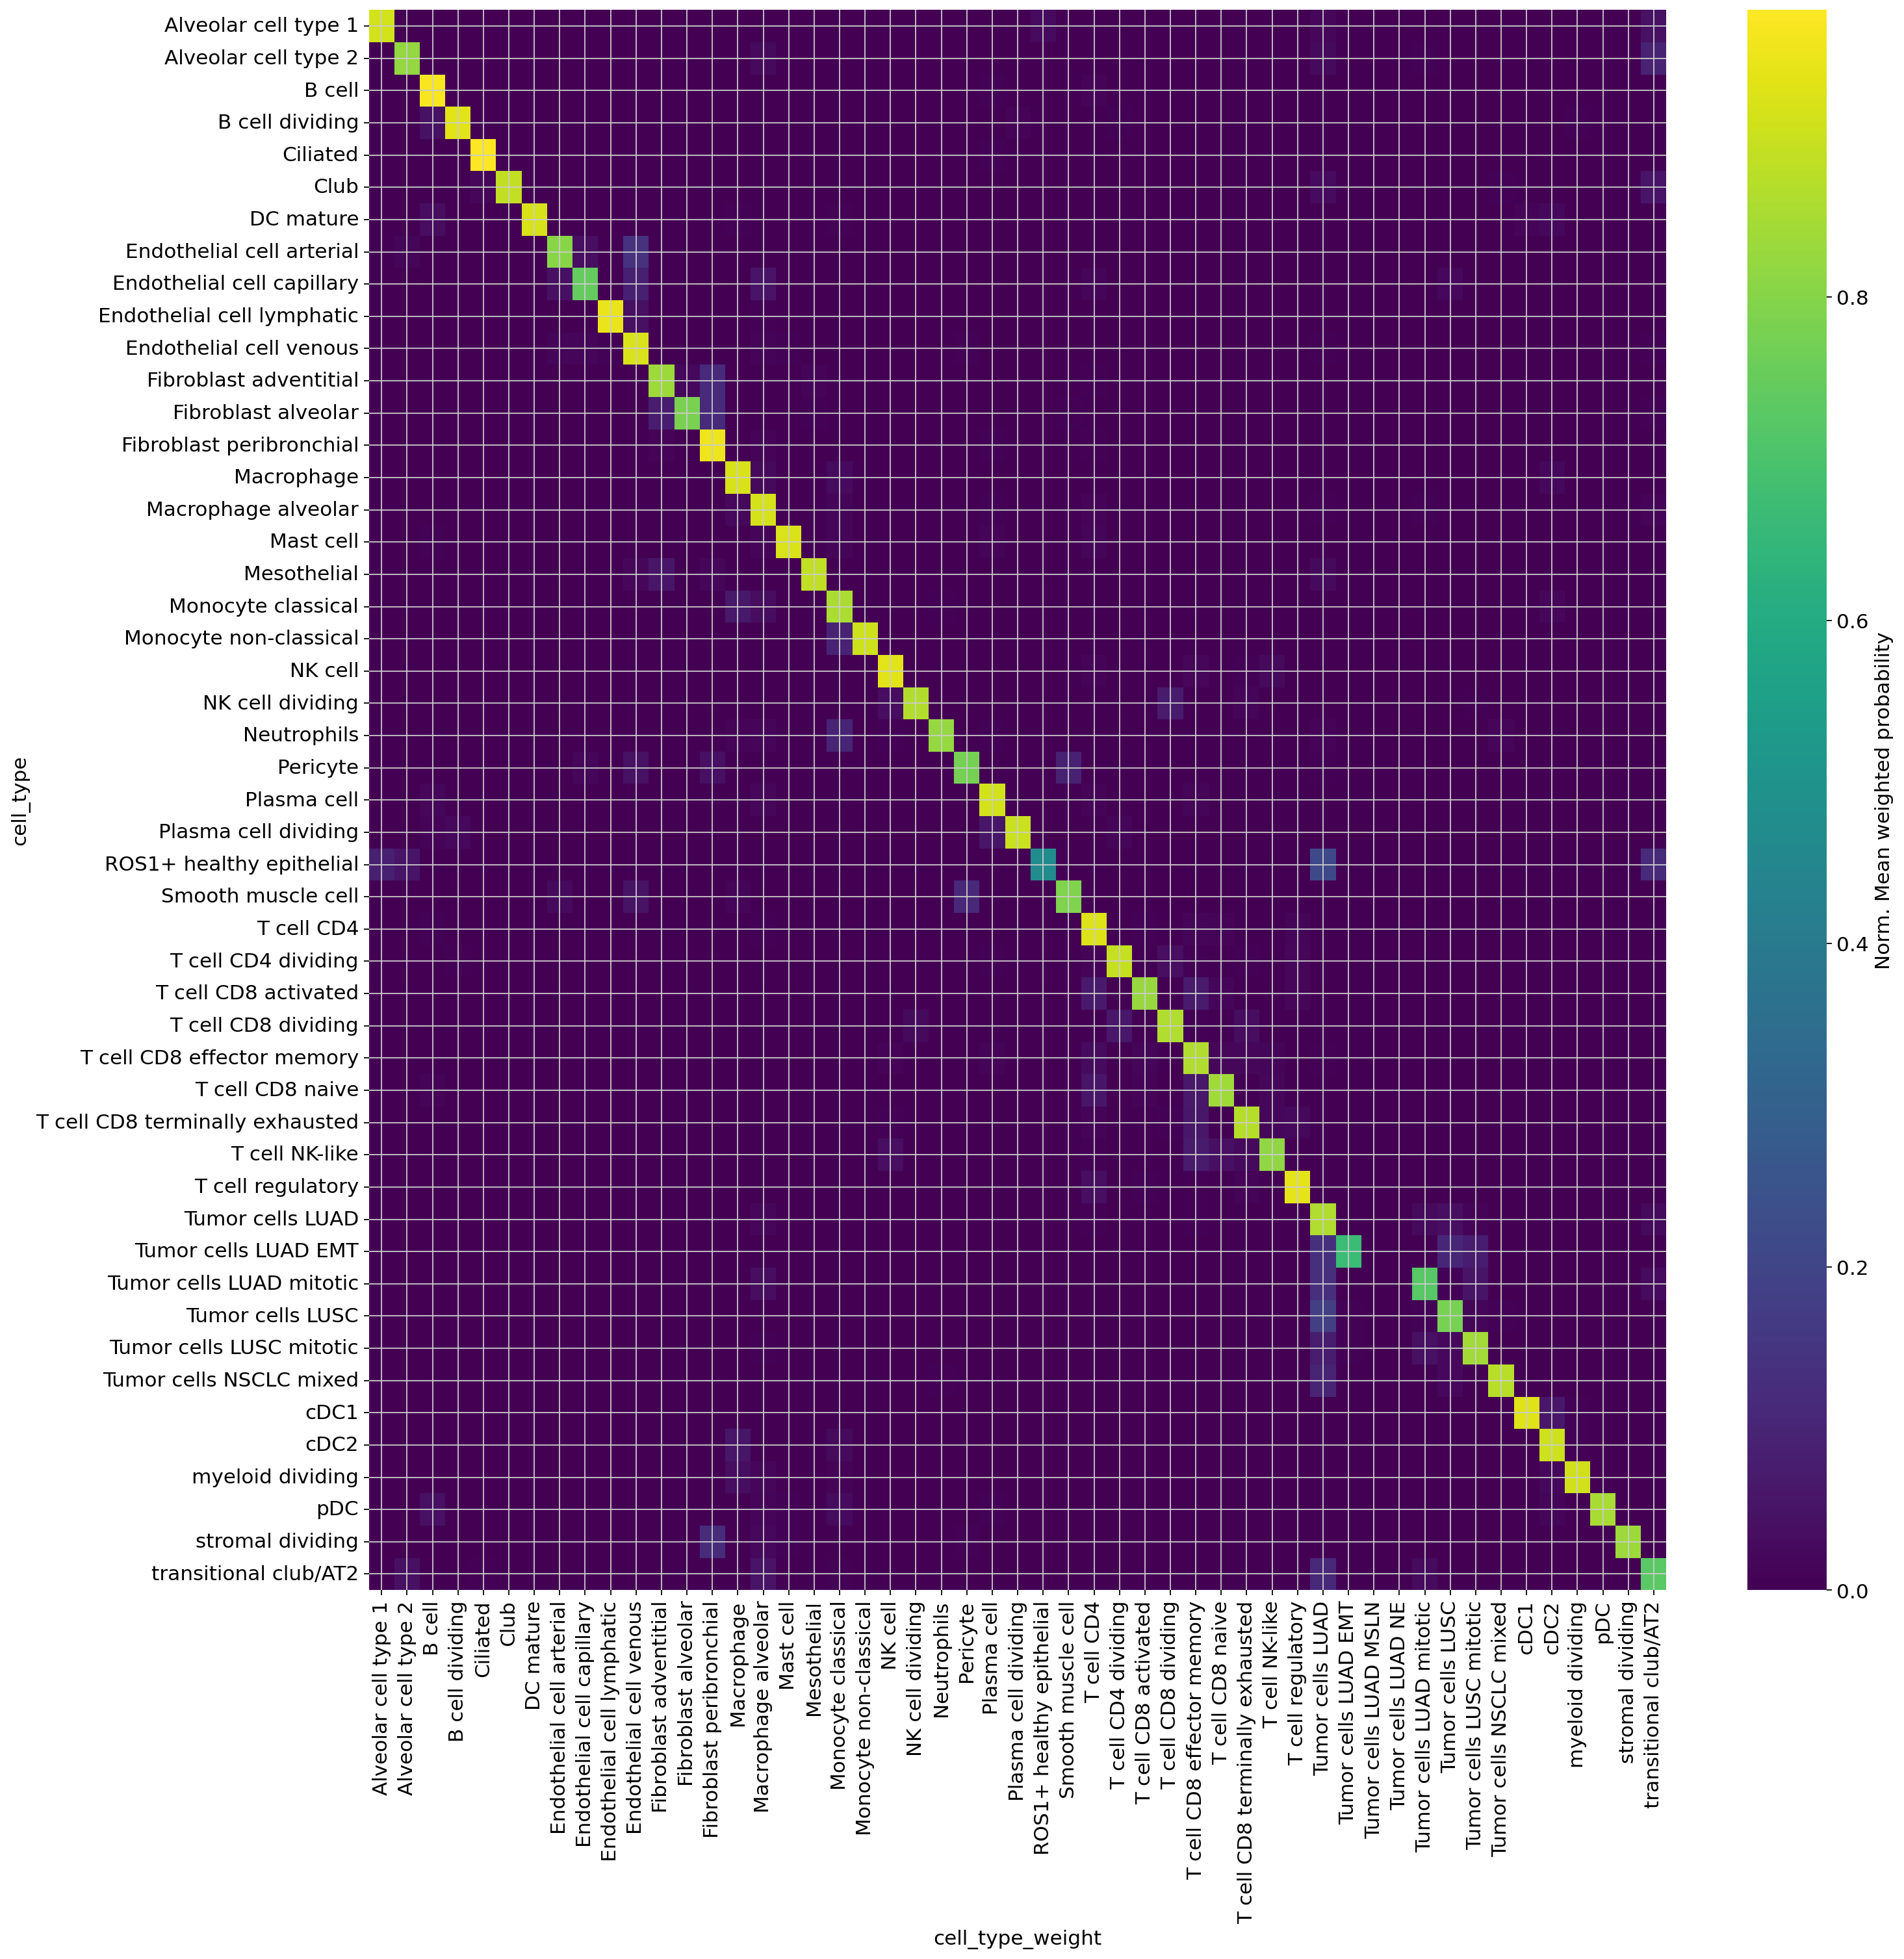

In [259]:
uncerts_group = uncerts_types.groupby(['cell_type']).mean()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(uncerts_group, cmap="viridis", cbar_kws={'label': 'Norm. Mean weighted probability'}, ax=ax)

### Confusion matrix Heatmap

In [264]:
adata_query.obs['ix'] = list(range(0,adata_query.obs.shape[0]))
query_latent.obs['ix'] = list(range(0,adata_query.obs.shape[0]))

Import cell types from Zuani. We build a common barcode from the adata we trained the model on and the adta they publish online

In [ ]:
adata_zuani = sc.read(f'{backup_dir}/Zuani_99acc_annoted/query.h5ad')
adata_zuani = adata_zuani[adata_zuani.obs.patient != 'Patient 4']
adata_zuani.obs['sample2'] = 'P' + adata_zuani.obs['patient'].str.split(' ').\
    map(lambda x: x[-1]) +  '_T' + adata_zuani.obs['sample'].str.split(' ').map(lambda x: x[-1])
adata_zuani.obs.index = adata_zuani.obs.sample2
adata_zuani.obs.index

In [ ]:
adata_query.obs.index = adata_query.obs.index.str.split('-').str[0] + '-' + adata_query.obs['sample'].astype(str)
adata_query.obs.index

In [236]:
adata_query.obs = adata_query.obs.join(annots_df, how='left')

In [276]:
query_latent.obs = adata_query.obs[['Cell types', 'ix']].merge(query_latent.obs, how='right', on='ix')
query_latent.obs

/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


,Cell types,ix,cell_type_pred_0,cell_type_uncertainty_0,cell_type_pred_1,cell_type_uncertainty_1,cell_type_pred_2,cell_type_uncertainty_2
0,Exhausted cytotoxic T cells 2,0,T cell CD8 activated,1.000000,transitional club/AT2,0.000000,stromal dividing,0.000000
1,NK cells (lower cytotoxicity),1,T cell CD8 effector memory,0.733185,T cell CD8 activated,0.266815,transitional club/AT2,0.000000
2,CD8+ T cells,2,T cell CD4,0.933473,T cell CD8 activated,0.066527,transitional club/AT2,0.000000
3,Naive T cells,3,T cell CD4,1.000000,transitional club/AT2,0.000000,stromal dividing,0.000000
4,NK cells (lower cytotoxicity),4,T cell CD8 effector memory,1.000000,transitional club/AT2,0.000000,stromal dividing,0.000000
...,...,...,...,...,...,...,...,...
220861,B cells,220861,Plasma cell,1.000000,transitional club/AT2,0.000000,stromal dividing,0.000000
220862,cDC2,220862,Monocyte classical,0.866680,Macrophage,0.133320,transitional club/AT2,0.000000
220863,AT2 cells,220863,transitional club/AT2,0.933084,Tumor cells LUAD,0.066916,stromal dividing,0.000000
220864,Cycling epithelial cells,220864,Tumor cells LUSC mitotic,0.371431,Tumor cells LUSC,0.361897,Tumor cells LUAD EMT,0.266671


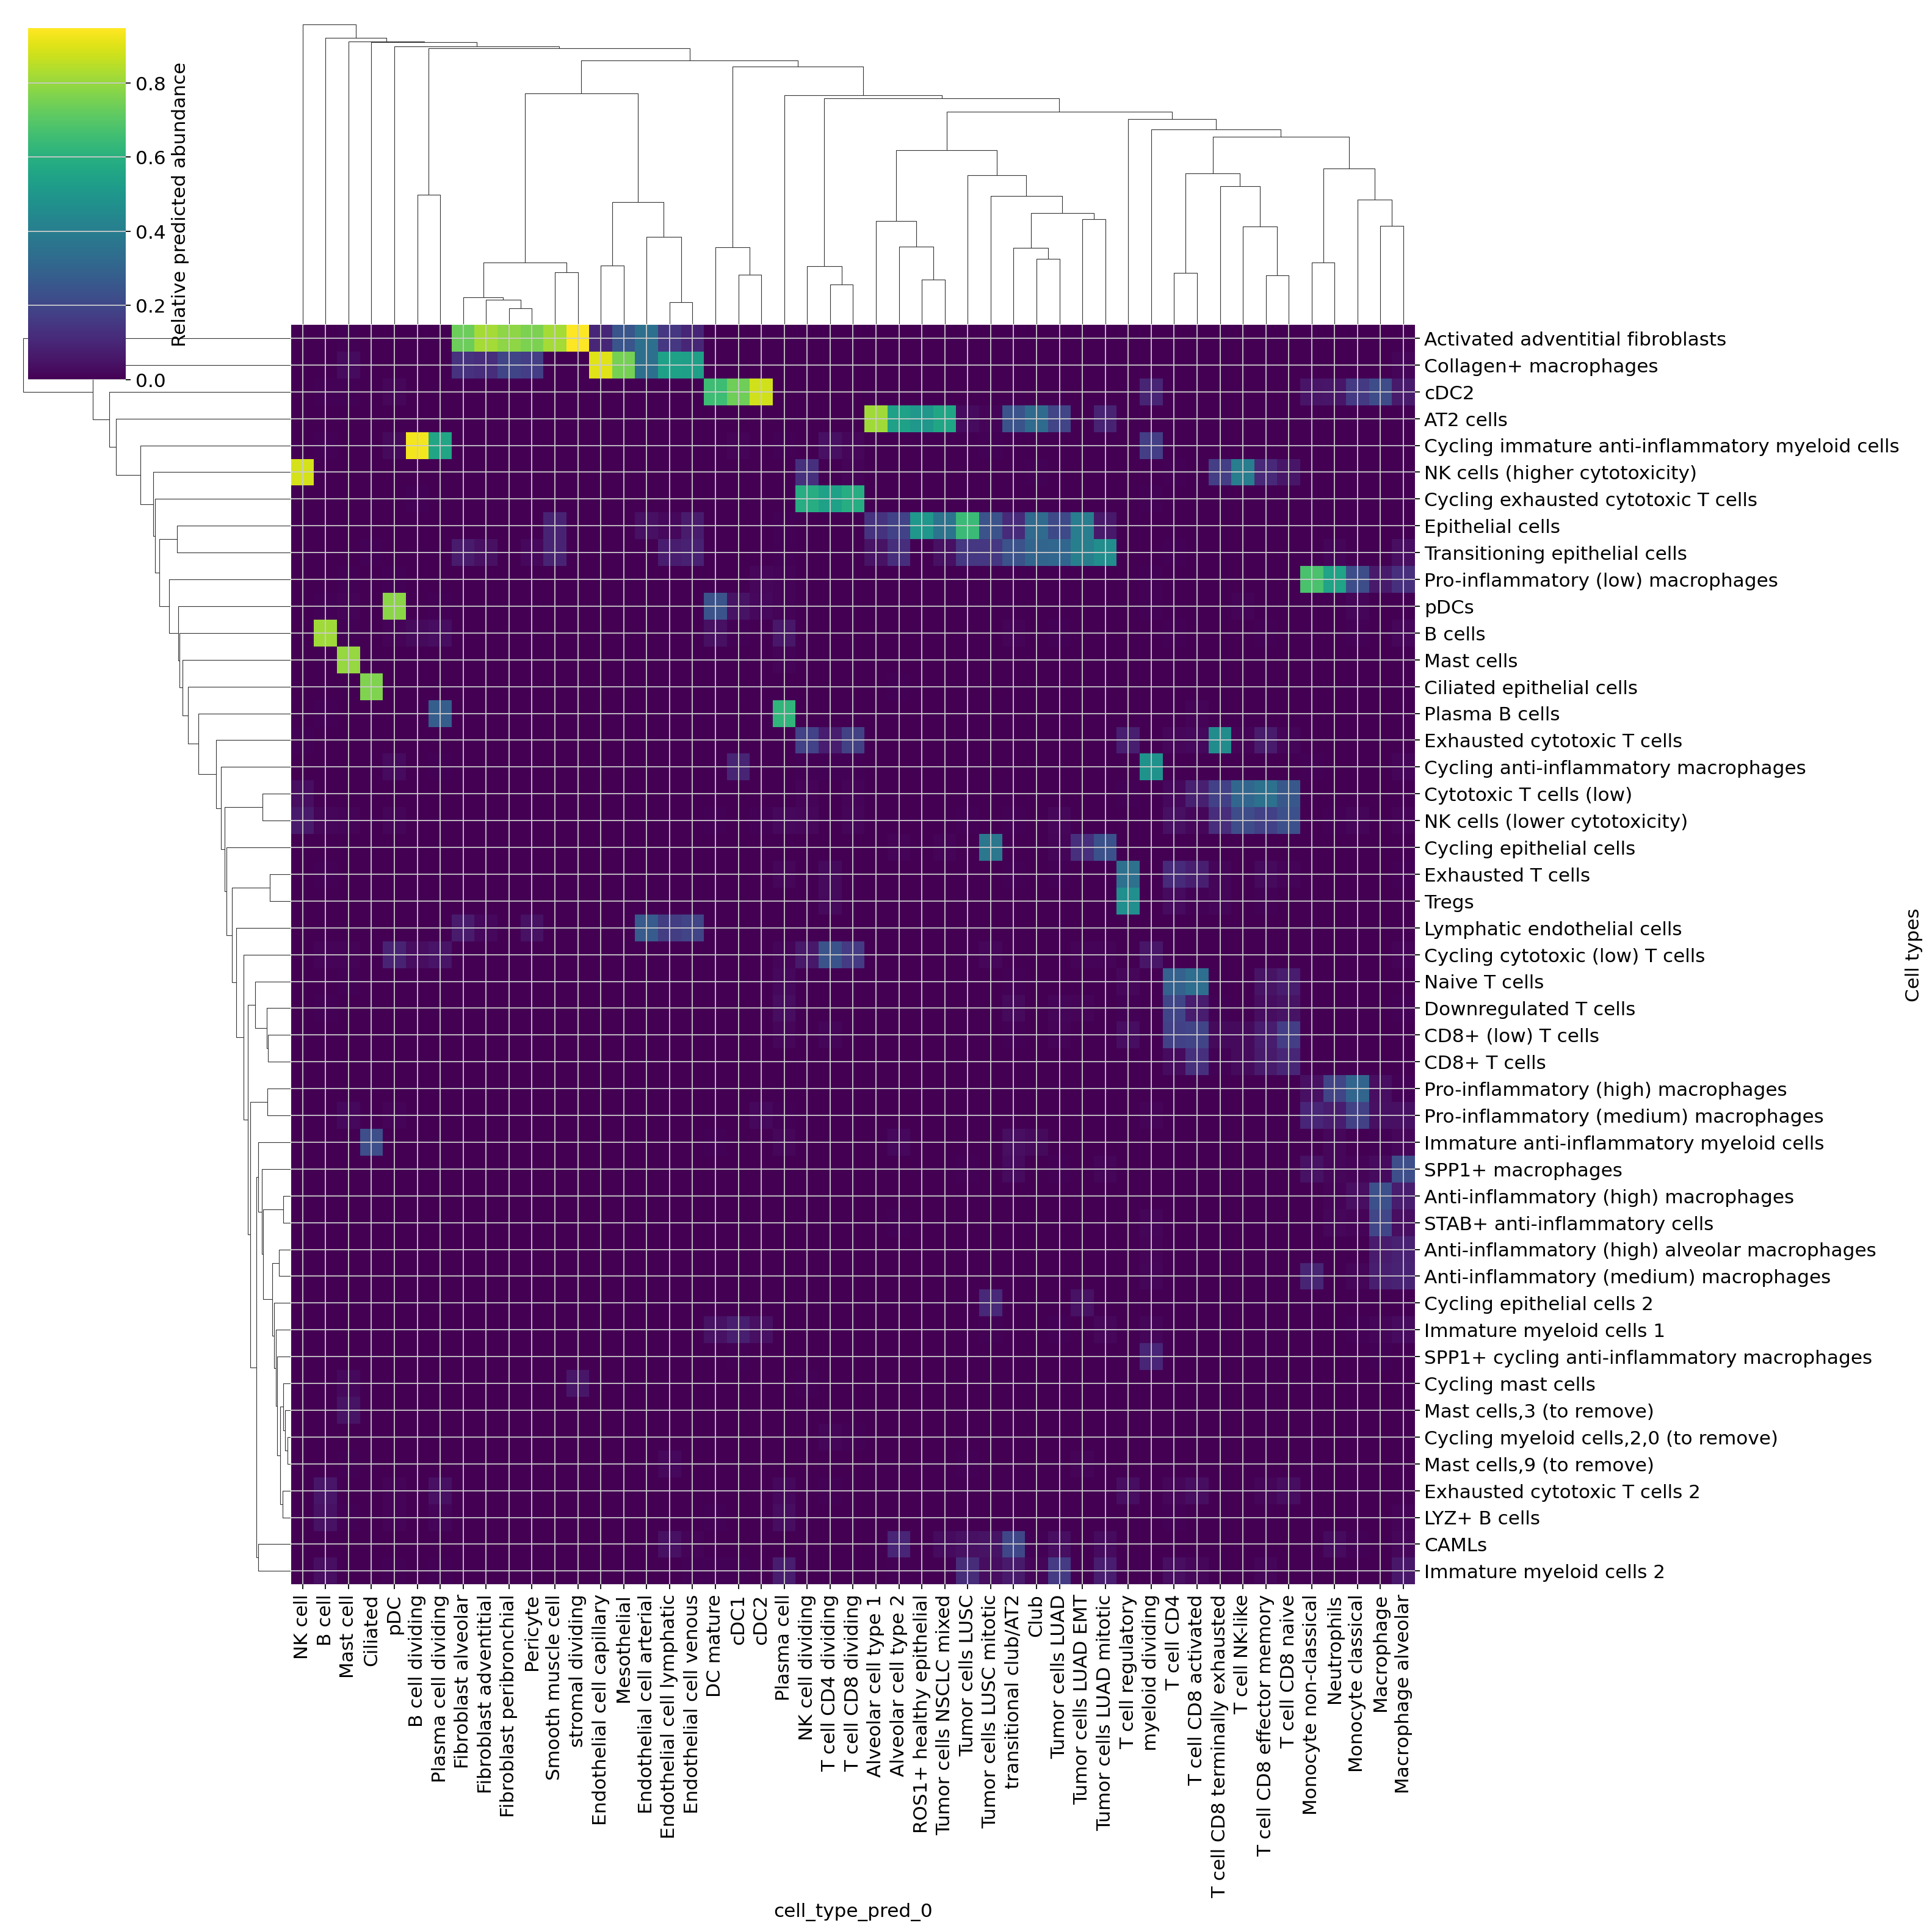

In [277]:
import seaborn as sns

df = query_latent.obs.groupby(["Cell types", "cell_type_pred_0"]).size().unstack(fill_value=0)
norm_df = df / df.sum(axis=0)
# corr_matrix = norm_df.corr()

axs = sns.clustermap(norm_df, row_cluster=True, cmap="viridis", cbar_kws={'label': 'Relative predicted abundance'},
                    figsize=(20,20))

# axs.ax_heatmap.set_xlabel('Predicted')
# axs.ax_heatmap.set_ylabel('Source')